In [1]:
import pandas as pd 
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

os.chdir('..')

In [22]:
window_size_array = np.arange(10, 101, 5)

## 1. Зависимость MACs и FLops от размера окна.

In [39]:
macs_lst = []
params_lst = []
for window_size in window_size_array:
    with open(f'logs/model_{window_size}/run.log', 'r') as file:
        first_line = file.readline()
        second_line = file.readline()
        macs = float(first_line.split(' ')[-2])
        params = float(second_line.split(' ')[-2])

        macs_lst.append(macs)
        # print(second_line.split(' ')[-1])
        if second_line.split(' ')[-1] == 'k':
            print('Check')
            params_lst.append(params * 1000)
        else:
            params_lst.append(params)

In [45]:
list(map(str, window_size_array))

['10',
 '15',
 '20',
 '25',
 '30',
 '35',
 '40',
 '45',
 '50',
 '55',
 '60',
 '65',
 '70',
 '75',
 '80',
 '85',
 '90',
 '95',
 '100']

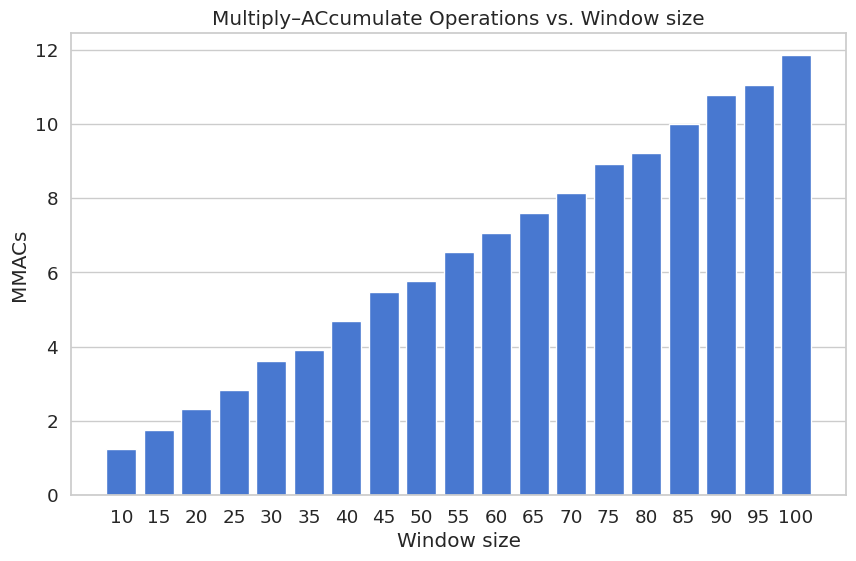

In [50]:
sns.set_theme(style='whitegrid', palette='muted', font_scale=1.2)
plt.figure(figsize=(10, 6))

plt.bar(list(map(str, window_size_array)), macs_lst)

plt.title('Multiply–ACcumulate Operations vs. Window size')
plt.xlabel('Window size')
plt.ylabel('MMACs')

plt.grid(axis='x')

plt.show()

## 2. Заивисмость точности от размеров окна

In [60]:
window_size_array = np.arange(10, 101, 5)
loss = []
accuracy = []
f1 = []
precision = []
recall = []

for window_size in window_size_array:
    df = pd.read_csv(f'logs/model_{window_size}/metrics.csv')
    best_epoch = np.where(df['valid_loss'] == df['valid_loss'].min())[0][0]

    loss.append(df['valid_loss'].to_list()[best_epoch])
    accuracy.append(df['test_accuracy'].to_list()[best_epoch])
    f1.append(df['test_f1'].to_list()[best_epoch])
    precision.append(df['test_precision'].to_list()[best_epoch])
    recall.append(df['test_f1'].to_list()[best_epoch])

<Figure size 1000x600 with 0 Axes>

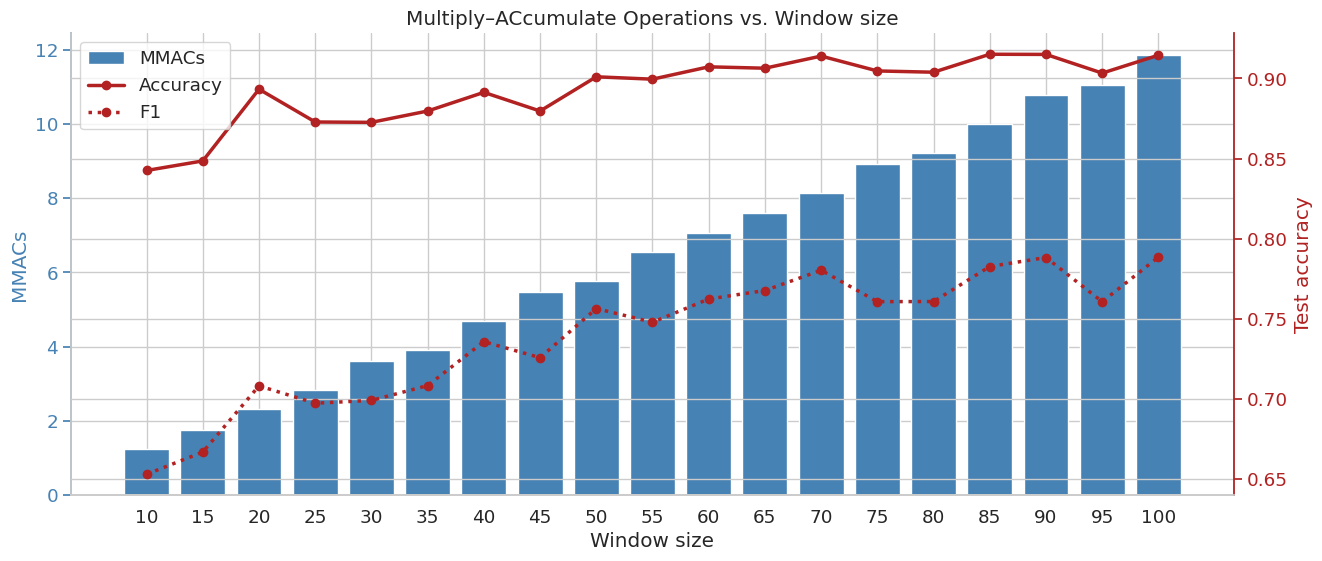

In [85]:
sns.set_theme(style='whitegrid', palette='muted', font_scale=1.2)
plt.figure(figsize=(10, 6))

fig, ax1 = plt.subplots(figsize=(15, 6))

ax1_color = 'steelblue'
ax2_color = 'firebrick'

ax1.bar(list(map(str, window_size_array)), macs_lst, label='MMACs', color=ax1_color)

plt.title('Multiply–ACcumulate Operations vs. Window size')
ax1.set_xlabel('Window size')
ax1.set_ylabel('MMACs', color=ax1_color)
ax1.tick_params(axis='y', colors=ax1_color)
ax1.spines['left'].set_color(ax1_color)

ax2 = ax1.twinx()
ax2.plot(list(map(str, window_size_array)), accuracy, label='Accuracy', color=ax2_color, marker='o', linewidth=2.5)
ax2.plot(list(map(str, window_size_array)), f1, label='F1', color=ax2_color, marker='o', linewidth=2.5, linestyle=':')
ax2.set_ylabel('Test accuracy', color=ax2_color)
ax2.tick_params(axis='y', colors=ax2_color)
ax2.spines['right'].set_color(ax2_color)

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
plt.xticks(rotation=45)

plt.grid(axis='x')

plt.show()

<Figure size 1000x600 with 0 Axes>

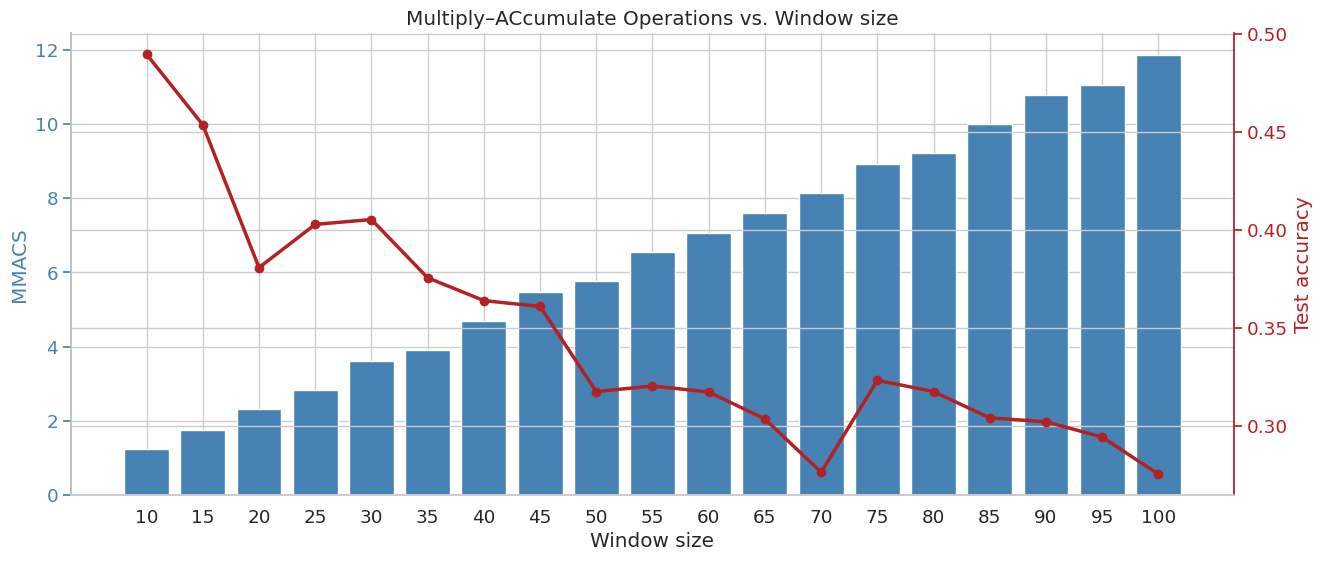

In [80]:
sns.set_theme(style='whitegrid', palette='muted', font_scale=1.2)
plt.figure(figsize=(10, 6))

fig, ax1 = plt.subplots(figsize=(15, 6))

ax1_color = 'steelblue'
ax2_color = 'firebrick'

ax1.bar(list(map(str, window_size_array)), macs_lst, label='MMACs', color=ax1_color)

plt.title('Multiply–ACcumulate Operations vs. Window size')
ax1.set_xlabel('Window size')
ax1.set_ylabel('MMACS', color=ax1_color)
ax1.tick_params(axis='y', colors=ax1_color)
ax1.spines['left'].set_color(ax1_color)

ax2 = ax1.twinx()
ax2.plot(list(map(str, window_size_array)), loss, label='Accuracy', color=ax2_color, marker='o', linewidth=2.5)
ax2.set_ylabel('Test accuracy', color=ax2_color)
ax2.tick_params(axis='y', colors=ax2_color)
ax2.spines['right'].set_color(ax2_color)

# lines_1, labels_1 = ax1.get_legend_handles_labels()
# lines_2, labels_2 = ax2.get_legend_handles_labels()
# ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
plt.xticks(rotation=45)

plt.grid(axis='x')

plt.show()

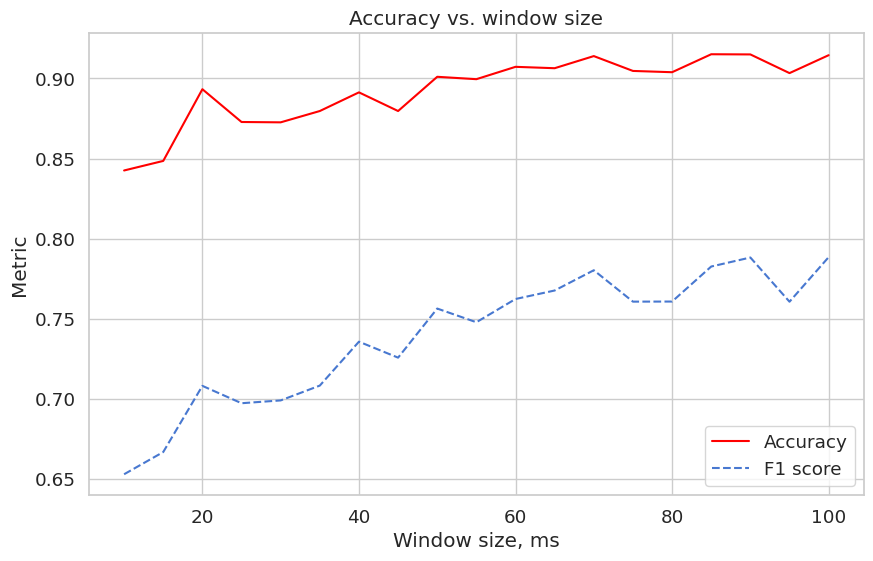

In [76]:
sns.set_theme(style='whitegrid', palette='muted', font_scale=1.2)
plt.figure(figsize=(10, 6))

plt.plot(window_size_array, accuracy, label='Accuracy', color='red')
plt.plot(window_size_array, f1, label='F1 score', linestyle='--')
# plt.plot(window_size_array, precision, label='Precision', linestyle='--')
# plt.plot(window_size_array, recall, label='Recall', linestyle='--')

plt.title('Accuracy vs. window size')
plt.xlabel('Window size, ms')
plt.ylabel('Metric')

plt.legend()
plt.show()